# Unsupervised Learning on Country Data

# Objective
HELP International, an NGO dedicated to fighting poverty and providing humanitarian relief, needs to decide how to best use their funds. With $10 million available, the CEO must identify the countries that are most in need. Our job is to use unsupervised learning techniques on socio-economic and health data to cluster countries by their level of development, ultimately highlighting those that require the most aid.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Dataset
The dataset, sourced from Kaggle (https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data), contains various socio-economic and health indicators for multiple countries. The goal of this dataset is to capture diverse attributes that reflect a country's overall development.

In [2]:
# Load the dataset (ensure the CSV file is in your working directory)
df = pd.read_csv("data/Country-data.csv")

<b>Attributes<b>
- Country name: Name of the country.
- Children mortality (child_mort): Death of children under 5 years of age per 1000 live births
- Exports (exports): Exports of goods and services per capita. Given as percentage of the GDP per capita.
- Health spending (health): Total health spending per capita. Given as percentage of the GDP per capita.
- Imports (imports): Imports of goods and services per capita. Given as percentage of the GDP per capita.
- Income (income): Net income per person.
- Inflation (inflation): The measurement of the annual growth rate of the Total GDP. o Life expectancy (life_expec): The average number of years a new born child would live if the current mortality patterns are to remain the same.
- Fertility (total_fer): The number of children that would be born to each woman if the current age-fertility rates remain the same.
- GDP per capita (gdpp): The GDP per capita. Calculated as the Total GDP divided by the total population.

In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [4]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.

In [5]:
# Check for missing values
print("\nMissing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


# Exploratory Data Analysis


Numeric Columns: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


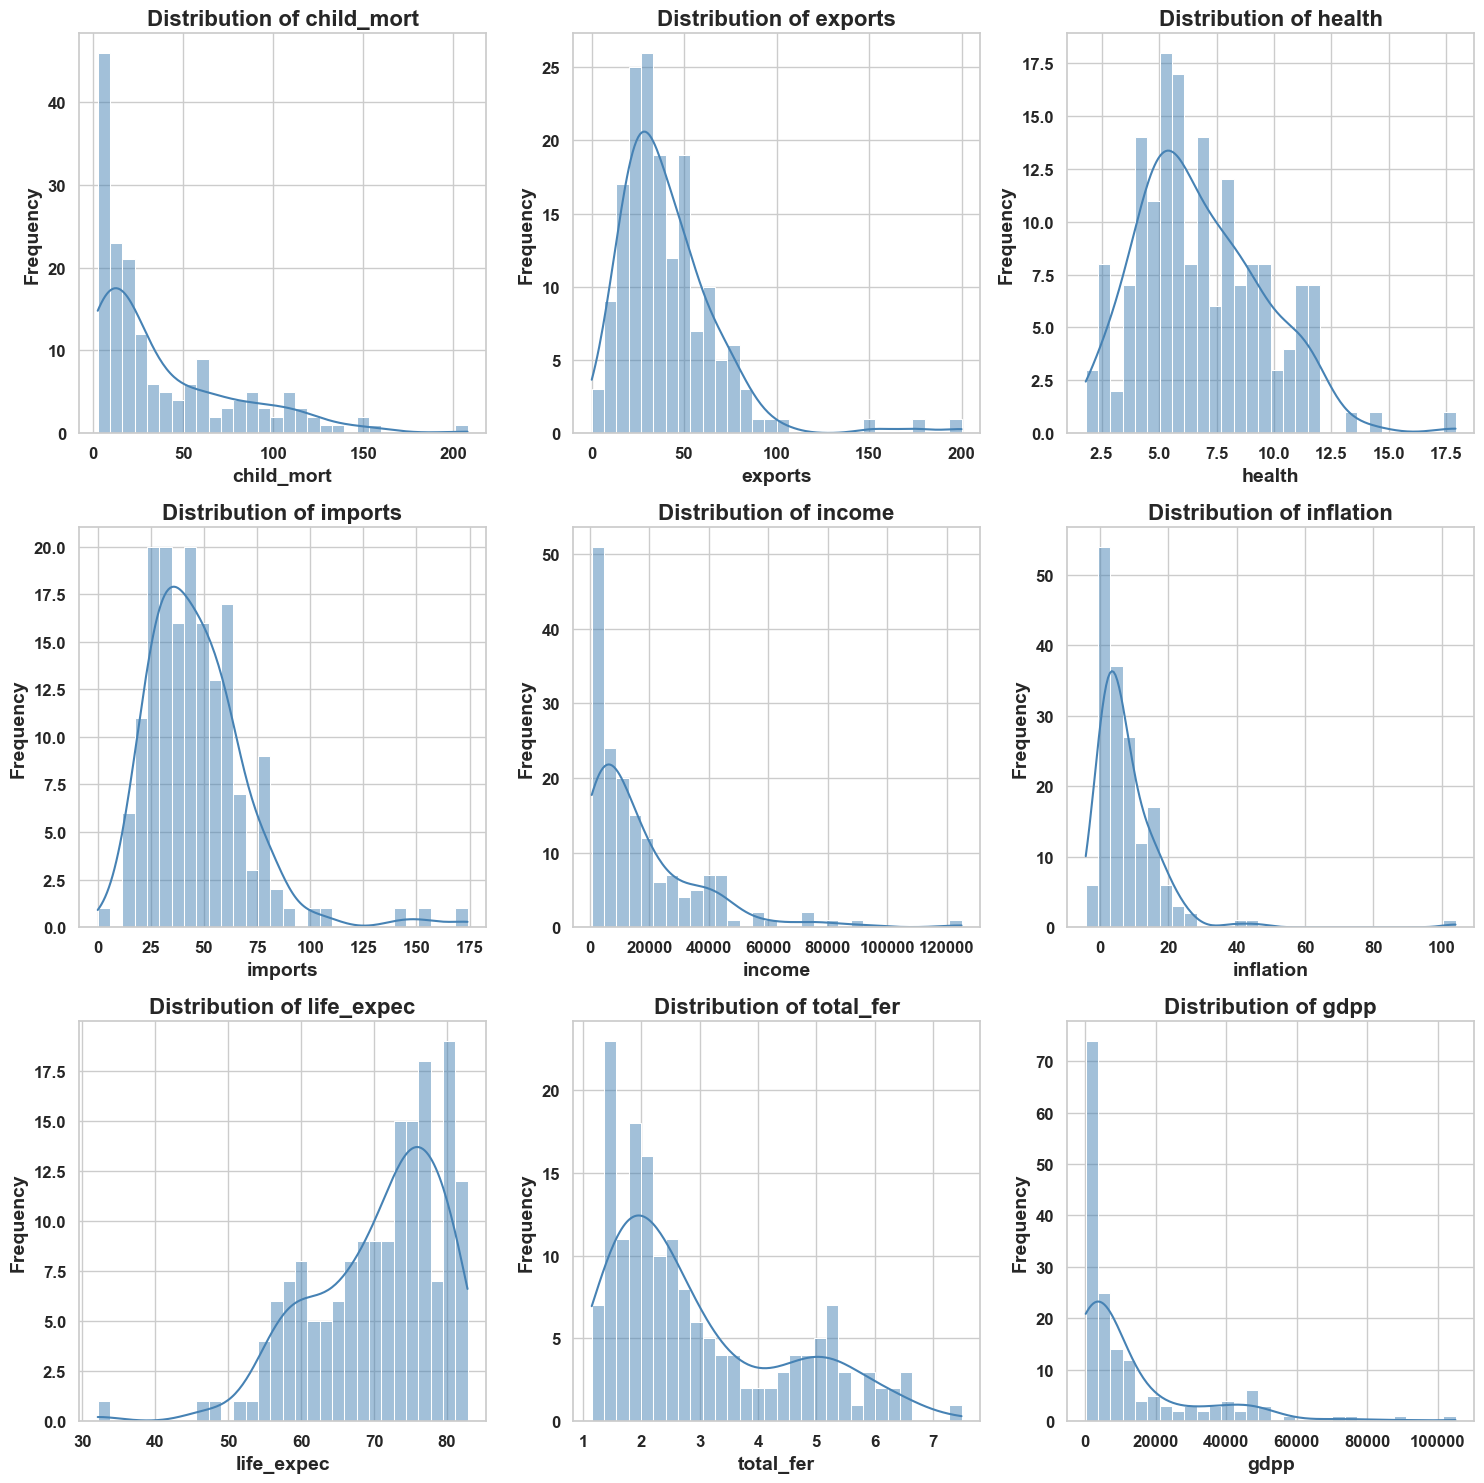

In [6]:
# Visualize distributions for numeric columns

# Identify numeric columns for further analysis
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric Columns:", num_cols)

# Set a consistent style and customize rcParams for a polished look
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titleweight"] = "bold"

# Calculate how many rows/cols we need for subplots
num_plots = len(num_cols)
ncols = 3
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color="steelblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=16, fontweight="bold")
    axes[i].set_xlabel(col, fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Frequency", fontsize=14, fontweight="bold")
    axes[i].tick_params(axis="both", which="major", labelsize=12, width=2)
    
    # Make axis tick labels bold
    for label in axes[i].get_xticklabels():
        label.set_fontweight("bold")
    for label in axes[i].get_yticklabels():
        label.set_fontweight("bold")

# Hide any unused subplots if num_cols is not divisible by ncols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

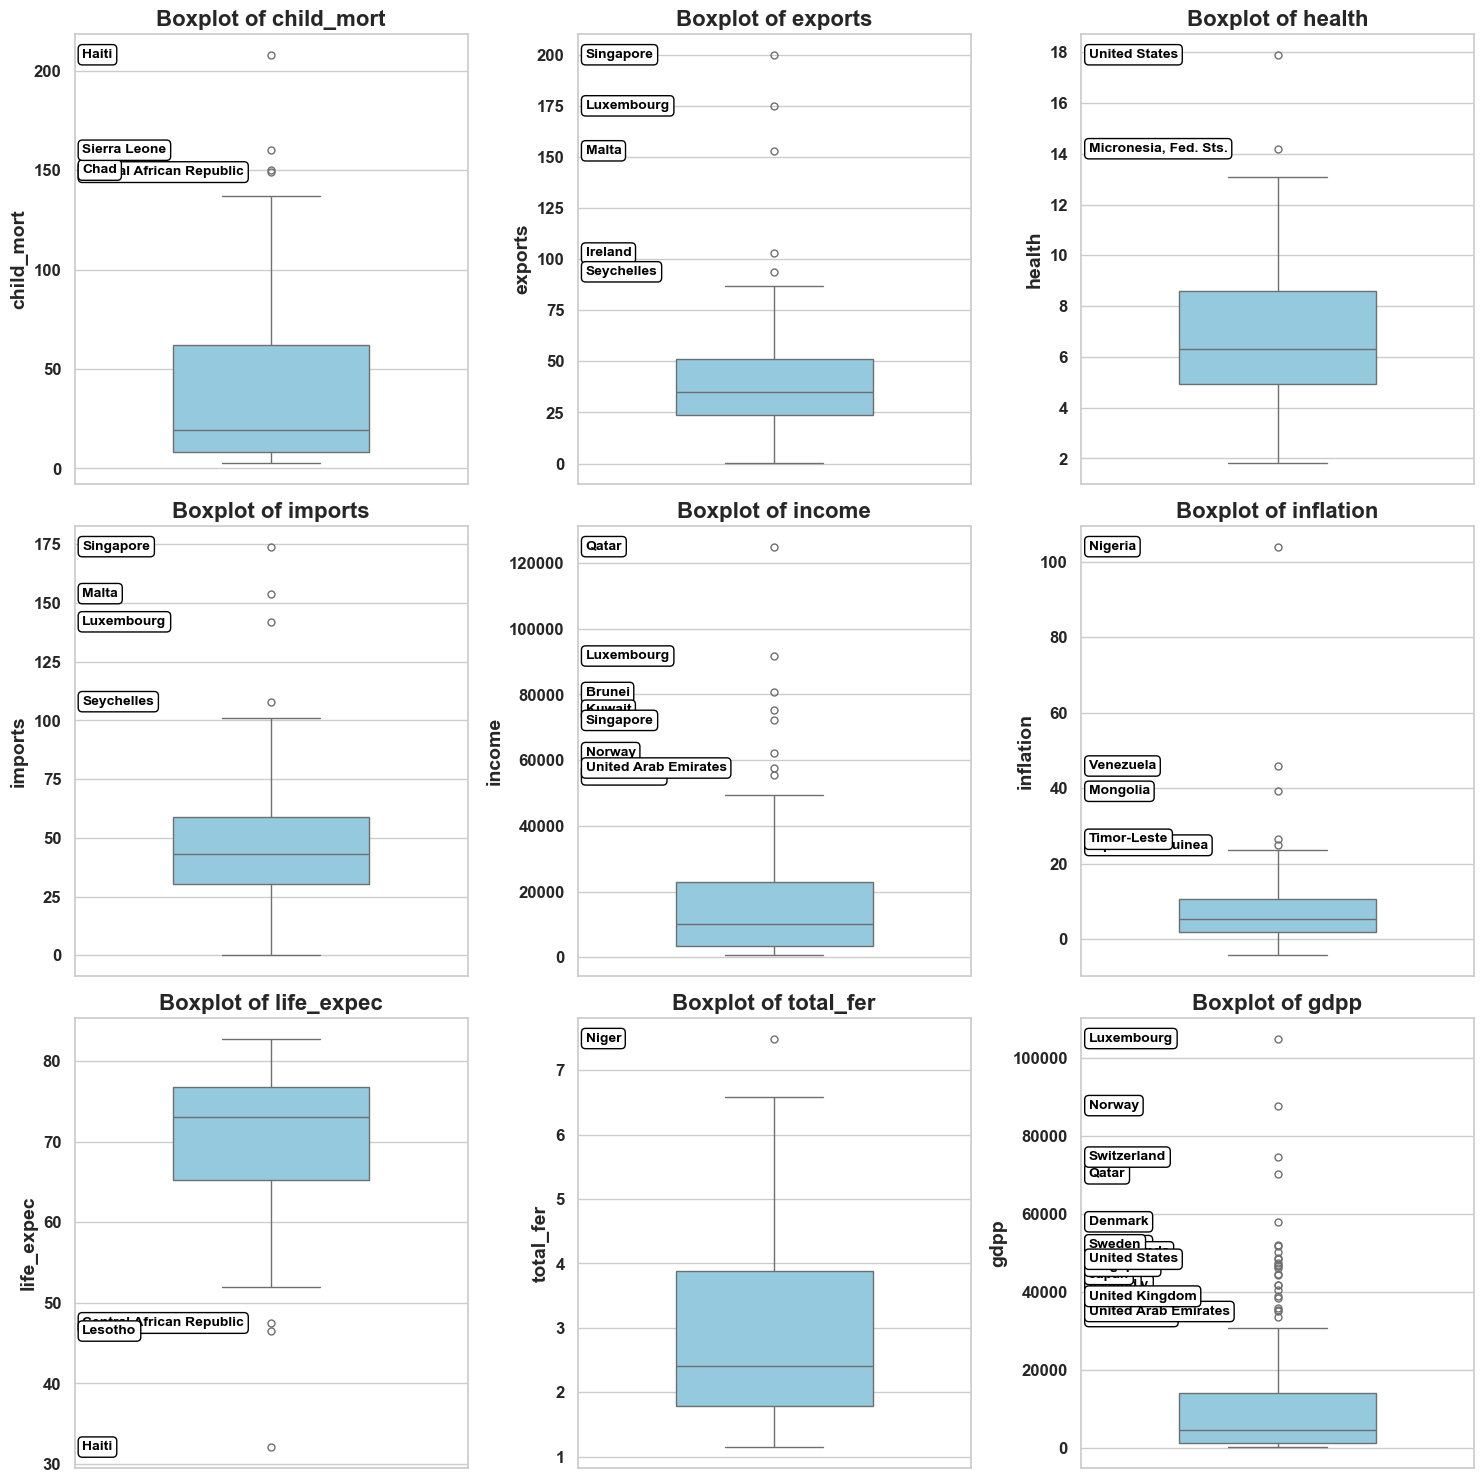

In [7]:
# Boxplot
num_plots = len(num_cols)
ncols = 3
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = sns.boxplot(y=df[col], ax=axes[i], color="skyblue", width=0.5, fliersize=5)
    ax.set_title(f"Boxplot of {col}", fontsize=16, fontweight="bold")
    ax.set_xlabel("")  # No xlabel needed
    ax.set_ylabel(col, fontsize=14, fontweight="bold")
    ax.tick_params(axis="both", which="major", labelsize=12, width=2)
    
    # Make axis tick labels bold
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    for label in ax.get_yticklabels():
        label.set_fontweight("bold")
    
    # -- Manually compute outliers using the IQR rule --
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows where the value is an outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Label outliers with the country name with a bounding box tag
    for idx, row in outliers.iterrows():
        y_val = row[col]
        ax.text(
            0.02, y_val,
            s=row["country"],
            ha="left",
            va="center",
            fontweight="bold",
            fontsize=10,
            color="black",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
            transform=ax.get_yaxis_transform()  # Align with y-axis scale
        )

# Remove extra subplots if num_cols isn't divisible by ncols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Wide range of values: For instance, child_mort ranges from 2.60 to 208.00, and gdpp ranges from 231 to 105000, indicating large disparities among countries.
- Presence of outliers: High maximum values in child_mort, exports, imports, inflation, and gdpp indicate outlier countries well above the general trends in these features. Low minimum values in life_expec indicate countries with very low life expectancy compared to the global distribution (e.g., Haiti).

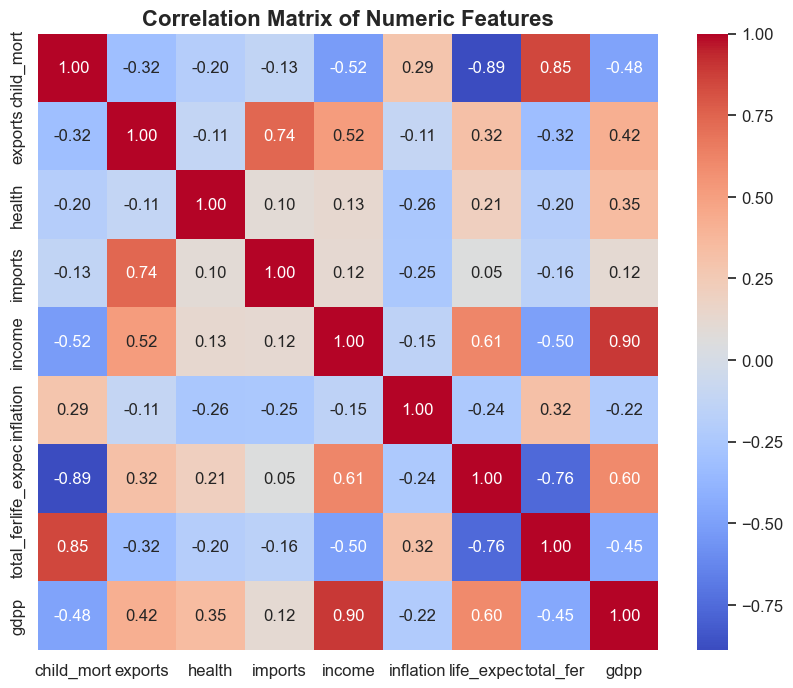

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

- income and gdpp have a strong positive correlation (0.90).
- child_mort and total_fer have a strong positive correlation (0.85).
- exports and imports are also positively correlated (0.74).
- life_expec and child_mort have a strong negative correlation (-0.89).
- life_expec and total_fer are also negatively correlated (-0.76).

# Data Preprocessing

- Missing values: No missing values detected in the dataset.
- Outliers: Features such as child_mort, exports, imports, inflation, and gdpp have large ranges. We keep these outliers, as they may be informative for clustering. However, we remain cautious about their impact on distance-based algorithms.
- Scaling: Given the wide range of values and the sensitivity of clustering algorithms to scale, all numeric features are scaled. This ensures each feature contributes proportionally to distance calculations during clustering.

In [9]:
# Standardize numeric features (important for clustering)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

print("\nFirst 5 rows of the standardized dataset:")
print(df_scaled.head())


First 5 rows of the standardized dataset:
               country  child_mort   exports    health   imports    income  \
0          Afghanistan    0.426485  0.049482  0.358608  0.257765  0.008047   
1              Albania    0.068160  0.139531  0.294593  0.279037  0.074933   
2              Algeria    0.120253  0.191559  0.146675  0.180149  0.098809   
3               Angola    0.566699  0.311125  0.064636  0.246266  0.042535   
4  Antigua and Barbuda    0.037488  0.227079  0.262275  0.338255  0.148652   

   inflation  life_expec  total_fer      gdpp  
0   0.126144    0.475345   0.736593  0.003073  
1   0.080399    0.871795   0.078864  0.036833  
2   0.187691    0.875740   0.274448  0.040365  
3   0.245911    0.552268   0.790221  0.031488  
4   0.052213    0.881657   0.154574  0.114242  


# Modeling

<b>K-Means Clustering<b>
- A popular, distance-based clustering algorithm that partitions data into k clusters.
- We experiment with different k values and use metrics like the elbow method and silhouette score to evaluate performance.

<b>Hierarchical Clustering<b>
- Builds a hierarchy of clusters either from the bottom-up (agglomerative) or top-down (divisive).
- We use Agglomerative Clustering with 'ward' linkage criteria and use silhouette score to evaluate performance.

<b>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)<b>
- Clusters points that are closely packed together and marks points that lie alone in low-density regions as outliers (noise).
- We experiment with eps (the radius of the neighborhood) and min_samples (the minimum number of points required to form a dense region).

In [10]:
# Prepare data
X = df_scaled.drop(columns=['country']) # 'country' is a separate column we won't use in clustering.

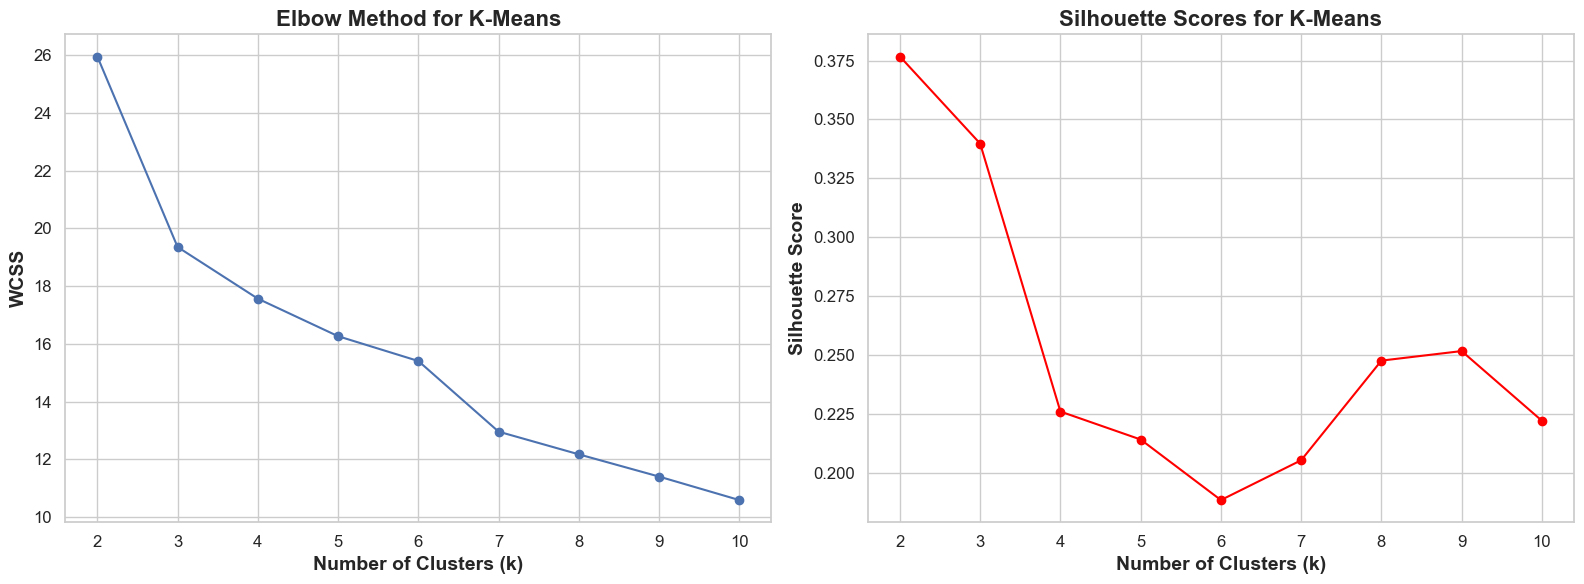

In [11]:
# K-means clustering

# Define range for k
k_values = range(2, 11)
wcss = [] # within-cluster sum of squares
silhouette_scores_kmeans = []

# Calculate WCSS and silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    # Append WCSS (inertia)
    wcss.append(kmeans.inertia_)
    # Calculate silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores_kmeans.append(score)
    
# Set up a figure with two subplots: one for the Elbow method, one for Silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Elbow Method: WCSS vs Number of Clusters
ax1.plot(k_values, wcss, marker='o')
ax1.set_title("Elbow Method for K-Means")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("WCSS")

# Plot the Silhouette Scores vs Number of Clusters
ax2.plot(k_values, silhouette_scores_kmeans, marker='o', color='red')
ax2.set_title("Silhouette Scores for K-Means")
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

From the results of the above methods, we select: k = 3

In [12]:
# Cluster profiling

# Fit model recommendation
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)
kmeans_3_labels = kmeans_3.labels_

# Add cluster labels to the dataframe
df['Cluster'] = kmeans_3_labels
df_scaled['Cluster'] = kmeans_3_labels

# Group by cluster and compute mean of each numeric feature
cluster_means = df.groupby('Cluster').mean(numeric_only=True)
cluster_sizes = df['Cluster'].value_counts().sort_index()
summary_table = cluster_means
summary_table['Cluster_Size'] = cluster_sizes

print("Average values of each feature per cluster (original scale):")
print(summary_table)

Average values of each feature per cluster (original scale):
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         22.490805  40.484931  6.242414  47.326045  12644.482759   7.599839   
1          4.897143  58.431429  8.917429  51.508571  45802.857143   2.535000   
2         94.733333  28.842444  6.289333  42.455556   3555.400000  12.214556   

         life_expec  total_fer          gdpp  Cluster_Size  
Cluster                                                     
0         72.457471   2.315632   6657.379310            87  
1         80.245714   1.741143  43117.142857            35  
2         59.342222   5.109111   1704.933333            45  


/var/folders/ly/w484tkcx5c7c7ybl9rgjy09r000fsz/T/ipykernel_14408/541254264.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Cluster', y=feat, data=df, ax=axes[i], palette=custom_palette)
/var/folders/ly/w484tkcx5c7c7ybl9rgjy09r000fsz/T/ipykernel_14408/541254264.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Cluster', y=feat, data=df, ax=axes[i], palette=custom_palette)
/var/folders/ly/w484tkcx5c7c7ybl9rgjy09r000fsz/T/ipykernel_14408/541254264.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Cluster', y=f

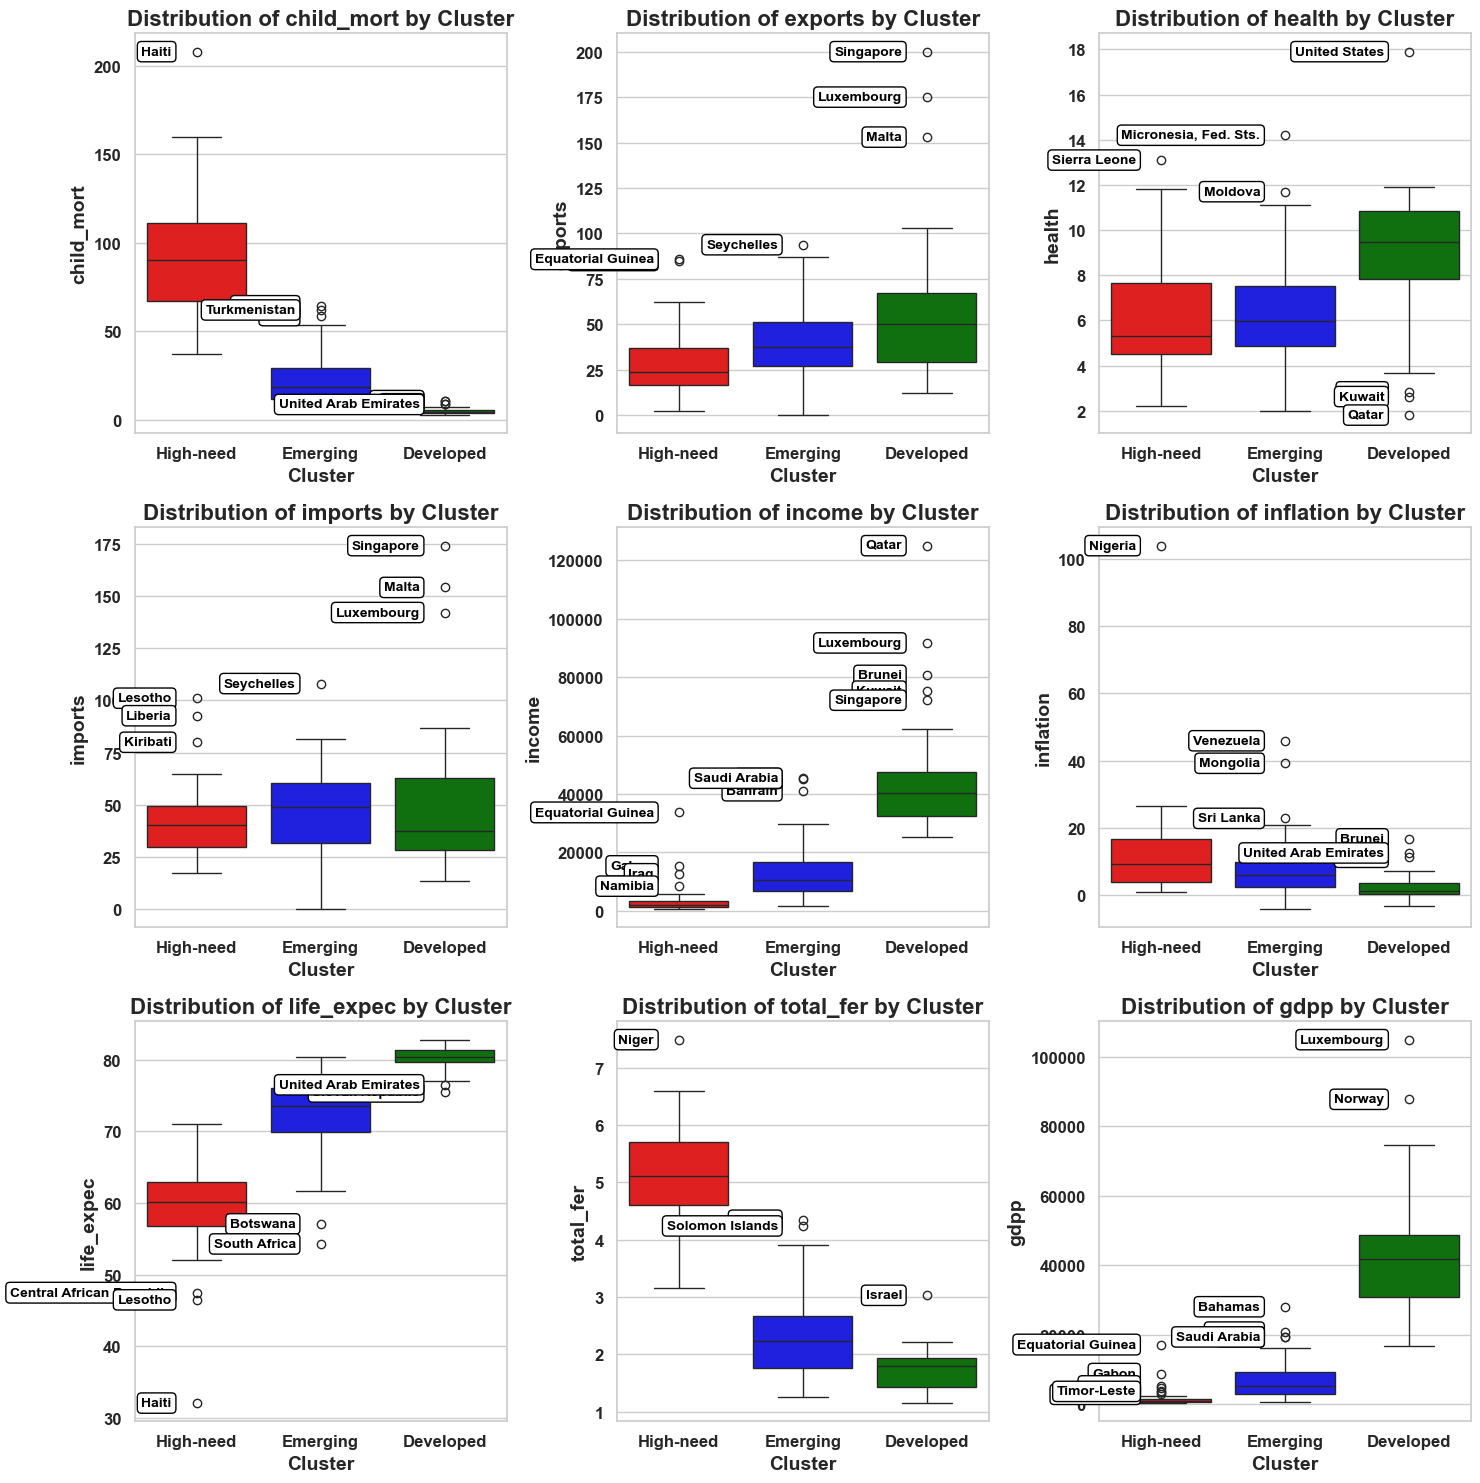

In [13]:
# Visualize feature distributions by cluster
features_to_plot = ['child_mort', 'exports', 'health', 'imports',
                    'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Map numeric clusters to descriptive names
df['Cluster'] = df['Cluster'].map({
    0: "Emerging",
    1: "Developed",
    2: "High-need"
})

# Define the custom color palette
custom_palette = {
    "Developed": "green",    # Developed countries in green
    "Emerging": "blue",      # Emerging countries in blue
    "High-need": "red"         # High-need countries in red
}

# Set the overall style and font sizes
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.titleweight"] = "bold"

num_plots = len(features_to_plot)
ncols = 3
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, feat in enumerate(features_to_plot):
    # Use the custom_palette instead of the default "pastel"
    ax = sns.boxplot(x='Cluster', y=feat, data=df, ax=axes[i], palette=custom_palette)
    ax.set_title(f"Distribution of {feat} by Cluster", fontsize=16, fontweight="bold")
    ax.set_xlabel("Cluster", fontsize=14, fontweight="bold")
    ax.set_ylabel(feat, fontsize=14, fontweight="bold")
    ax.tick_params(axis="both", which="major", labelsize=12, width=2)
    
    # Make axis tick labels bold
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    for label in ax.get_yticklabels():
        label.set_fontweight("bold")
    
    # Create a mapping from cluster label to its x-axis coordinate
    xticks = ax.get_xticks()  # numeric positions of each category
    xticklabels = [label.get_text() for label in ax.get_xticklabels()]
    cluster_positions = {str(cat): pos for cat, pos in zip(xticklabels, xticks)}
    
    # For each cluster, compute outliers using the IQR rule and annotate them
    for cluster in df['Cluster'].unique():
        cluster_df = df[df['Cluster'] == cluster]
        Q1 = cluster_df[feat].quantile(0.25)
        Q3 = cluster_df[feat].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get the outlier rows for this cluster
        outliers = cluster_df[(cluster_df[feat] < lower_bound) | (cluster_df[feat] > upper_bound)]
        
        # Determine the x-coordinate for this cluster box
        cluster_str = str(cluster)
        x_pos = cluster_positions.get(cluster_str, None)
        if x_pos is None:
            continue
        
        # Annotate each outlier with its country label.
        # The x offset (-0.2) shifts the text slightly to the left of the box center.
        for idx, row in outliers.iterrows():
            y_val = row[feat]
            ax.text(x_pos - 0.2, y_val, row["country"],
                    ha="right", va="center", fontweight="bold", fontsize=10,
                    color="black",
                    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
            
# Remove extra subplots if the number of plots isn't divisible by ncols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

After selecting K-Means with k = 3 clusters as a balanced approach for segmenting countries based on socio-economic and health factors, the model yielded the following clusters:

- Developed countries (Cluster 2 - 36 countries):
Highest income (avg. $45800), lowest child mortality, highest life expectancy (80.3).
Exports and imports are also high relative to GDP.
Represents highly developed nations with strong economic and health infrastructures.

- Emerging countries (Cluster 1 - 86 countries):
Moderate income, child mortality, and life expectancy.
GDP per capita is around $6660, significantly below Cluster 2 but much higher than Cluster 0.
Developing or emerging economies with room for improvement in socio-economic conditions.

- High-need countries (Cluster 0 - 45 countries):
Lowest income (avg. $3560), highest child mortality (94.7), lowest life expectancy (59.3).
Very high fertility rate (5.1) and inflation (12.2).
Clearly underdeveloped or high-need countries requiring urgent humanitarian and developmental support.

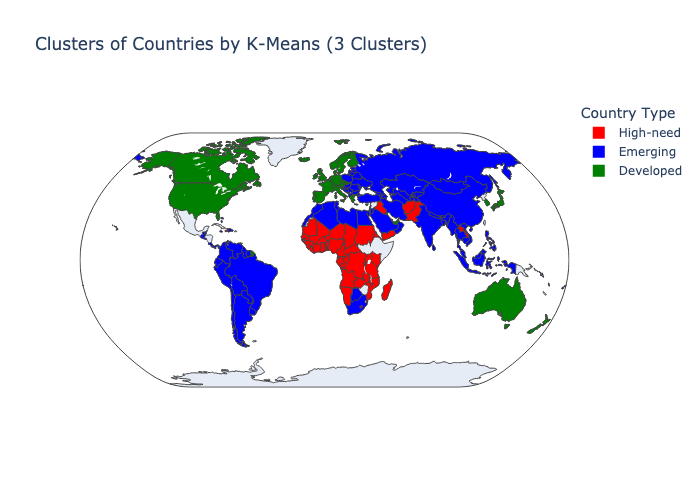

In [14]:
# Visualize world map

# Create the choropleth map with custom colors
fig = px.choropleth(
    data_frame=df,
    locations="country",
    locationmode="country names",
    color="Cluster",
    hover_name="country",
    color_discrete_map={
        "Developed": "green",
        "Emerging": "blue",  
        "High-need": "red"   
    },
    title="Clusters of Countries by K-Means (3 Clusters)",
    projection="natural earth"
)

fig.update_layout(legend_title_text='Country Type')
# Use 'renderer="png"' for a static image in the notebook
fig.show(renderer='png')
# Removing the renderer argument will display an interactive version, which is suitable when running the app externally (e.g., outside GitHub).
# To see the interactive map, run: fig.show()

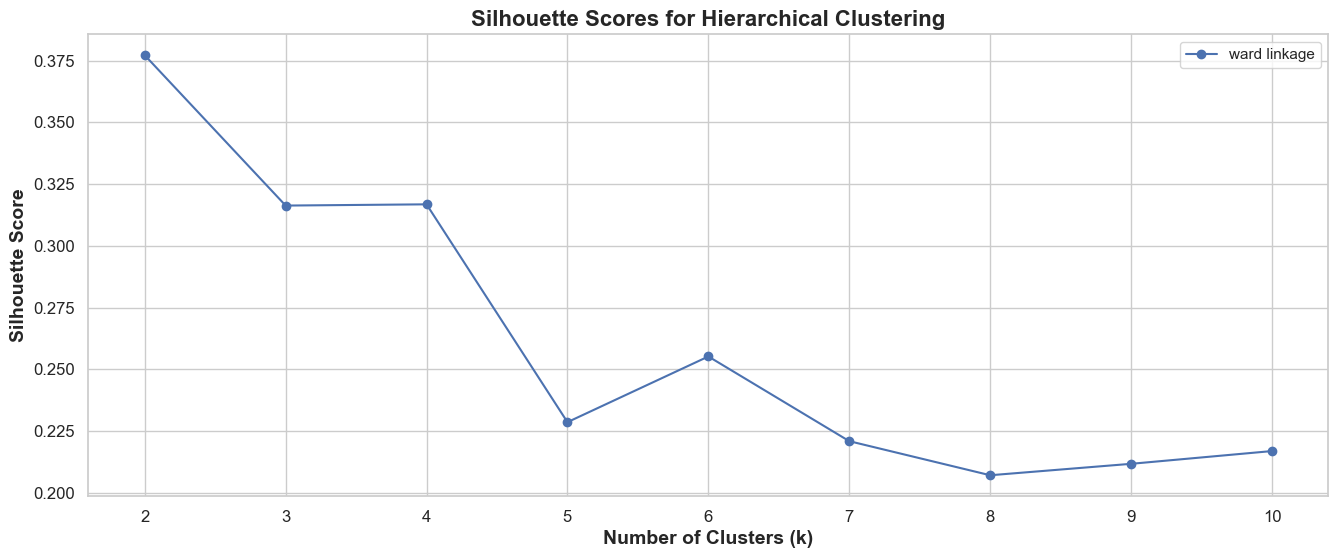

In [15]:
# Hierarchical clustering

# Define linkage methods and the range for k (number of clusters)
linkages = ['ward']
k_values = range(2, 11)

# Create a dictionary to store silhouette scores for each linkage type
silhouette_scores_hier = {linkage: [] for linkage in linkages}

# Loop over each linkage method and each number of clusters
for linkage in linkages:
    for k in k_values:
        # For ward linkage, AgglomerativeClustering uses Euclidean distance by default.
        # For complete and average, the metric is also Euclidean unless specified.
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(X)
        
        # Compute the silhouette score and store it
        score = silhouette_score(X, labels)
        silhouette_scores_hier[linkage].append(score)

# Set up a plot to compare the silhouette scores across linkage methods
plt.figure(figsize=(16, 6))
for linkage in linkages:
    plt.plot(k_values, silhouette_scores_hier[linkage], marker='o', label=f"{linkage} linkage")
    
plt.title("Silhouette Scores for Hierarchical Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

From the results above, we select: k = 3 with linkage = 'ward'

In [16]:
# Cluster profiling

# Fit model recommendation
hclust_3_av = AgglomerativeClustering(n_clusters=3, linkage='ward')
hclust_3_av_labels = hclust_3_av.fit_predict(X)

# Add cluster labels to the dataframe
df['Cluster'] = hclust_3_av_labels
df_scaled['Cluster'] = hclust_3_av_labels

# Group by cluster and compute mean of each numeric feature
cluster_means = df.groupby('Cluster').mean(numeric_only=True)
cluster_sizes = df['Cluster'].value_counts().sort_index()
summary_table = cluster_means
summary_table['Cluster_Size'] = cluster_sizes

print("Average values of each feature per cluster (original scale):")
print(summary_table)

Average values of each feature per cluster (original scale):
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0          5.961765  58.508824  8.501176  48.902941  47588.235294   4.115500   
1         97.102439  29.349244  5.551220  37.969900   3569.097561  12.807195   
2         23.991304  39.919348  6.756304  50.121739  11943.804348   6.897217   

         life_expec  total_fer          gdpp  Cluster_Size  
Cluster                                                     
0         79.982353   1.888529  43170.588235            34  
1         59.675610   5.129756   1680.731707            41  
2         71.920652   2.367174   6829.391304            92  


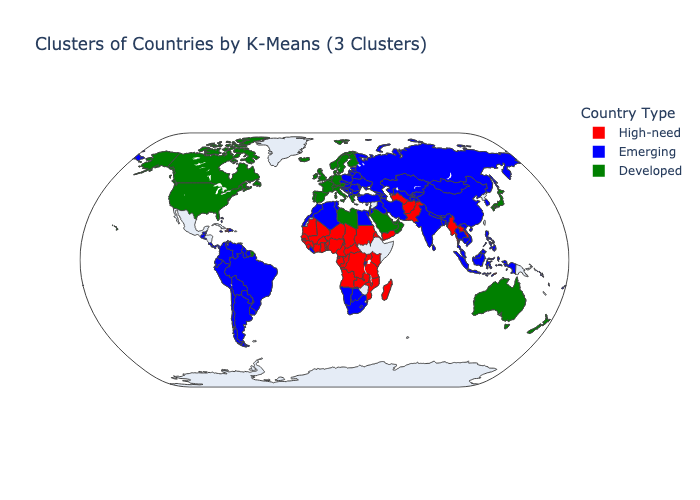

In [17]:
# Visualize world map

# Map numeric clusters to descriptive names
df['Cluster'] = df['Cluster'].map({
    0: "Developed",
    1: "High-need",
    2: "Emerging"
})

# Define the custom color palette
custom_palette = {
    "Developed": "green",    # Developed countries in green
    "Emerging": "blue",      # Emerging countries in blue
    "High-need": "red"         # High-need countries in red
}

# Create the choropleth map with custom colors
fig = px.choropleth(
    data_frame=df,
    locations="country",
    locationmode="country names",
    color="Cluster",
    hover_name="country",
    color_discrete_map={
        "Developed": "green",
        "Emerging": "blue",  
        "High-need": "red"   
    },
    title="Clusters of Countries by K-Means (3 Clusters)",
    projection="natural earth"
)

fig.update_layout(legend_title_text='Country Type')
# Use 'renderer="png"' for a static image in the notebook
fig.show(renderer='png')
# Removing the renderer argument will display an interactive version, which is suitable when running the app externally (e.g., outside GitHub).
# To see the interactive map, run: fig.show()

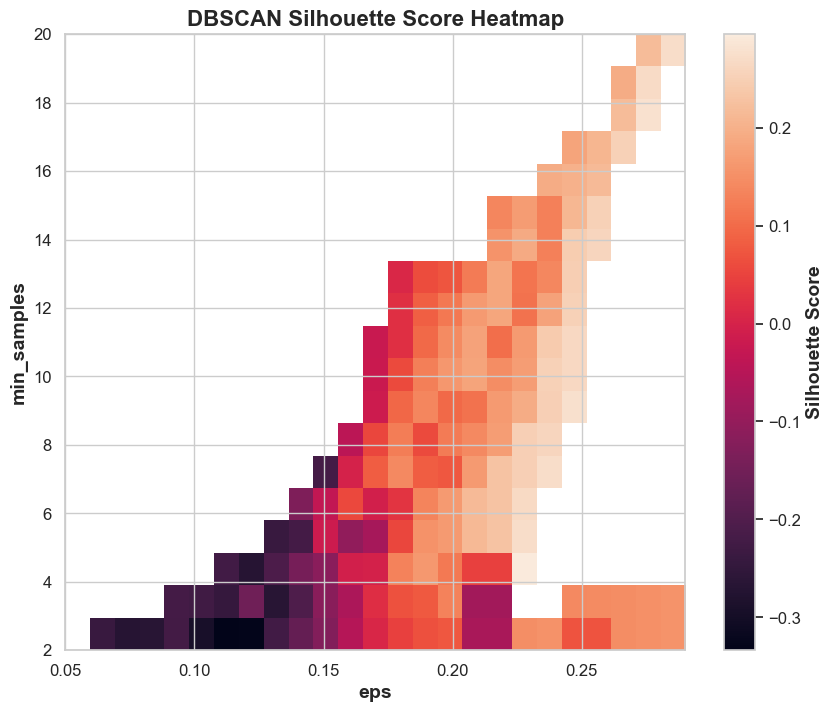

In [18]:
# DBSCAN

# Define the range of DBSCAN parameters to test
eps_values = np.arange(0.05, 0.30, 0.01)
min_samples_values = range(2, 21, 1)

# Create an empty list to store results
results = []

# Loop through each combination of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        # Count clusters: exclude noise (-1) from cluster count
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # Compute the silhouette score only if more than one cluster is found
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = np.nan  # Not a valid configuration for silhouette score
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'silhouette': score
        })

# Convert results to a DataFrame for easier analysis
df_results = pd.DataFrame(results)

# Pivot the table to create a matrix of silhouette scores
# Rows: min_samples, Columns: eps, Values: silhouette score
pivot_table = df_results.pivot(index='min_samples', columns='eps', values='silhouette')

# Plot a heatmap of the silhouette scores using matplotlib's imshow
plt.figure(figsize=(10, 8))
# 'origin' is set to 'lower' so that lower min_samples values are at the bottom
cax = plt.imshow(pivot_table, interpolation='nearest', aspect='auto', origin='lower', 
                 extent=[eps_values[0], eps_values[-1], min(pivot_table.index), max(pivot_table.index)])
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("DBSCAN Silhouette Score Heatmap")
plt.colorbar(cax, label="Silhouette Score")
plt.show()

From the results above, we select: eps = 0.23 and min_samples = 9, a combination that provides the best silhouette score with n_clusters = 3 for a direct comparison with the K-means and Hierarchical Clustering models.

In [19]:
# Cluster profiling

# Fit model recommendation
dbscan_3_best = DBSCAN(eps=0.23, min_samples=9)
dbscan_3_best_labels = dbscan_3_best.fit_predict(X)

# Add cluster labels to the dataframe
df['Cluster'] = dbscan_3_best_labels
df_scaled['Cluster'] = dbscan_3_best_labels

# Group by cluster and compute mean of each numeric feature
cluster_means = df.groupby('Cluster').mean(numeric_only=True)
cluster_sizes = df['Cluster'].value_counts().sort_index()
summary_table = cluster_means
summary_table['Cluster_Size'] = cluster_sizes

print("Average values of each feature per cluster (original scale):")
print(summary_table)

Average values of each feature per cluster (original scale):
         child_mort    exports     health    imports        income  inflation  \
Cluster                                                                         
-1        61.651111  50.013556   6.604222  54.637778  21884.111111  13.481422   
 0        21.331325  40.454084   6.288916  47.274288  12938.192771   6.347880   
 1         4.205000  39.085000  10.262000  37.445000  38435.000000   1.337650   
 2        92.747368  25.010526   5.990000  36.805263   1884.631579   7.330263   

         life_expec  total_fer          gdpp  Cluster_Size  
Cluster                                                     
-1        66.126667   3.829111  15192.844444            45  
 0        73.136145   2.199639   7310.506024            83  
 1        81.020000   1.786000  42985.000000            20  
 2        58.757895   5.353158    782.315789            19  


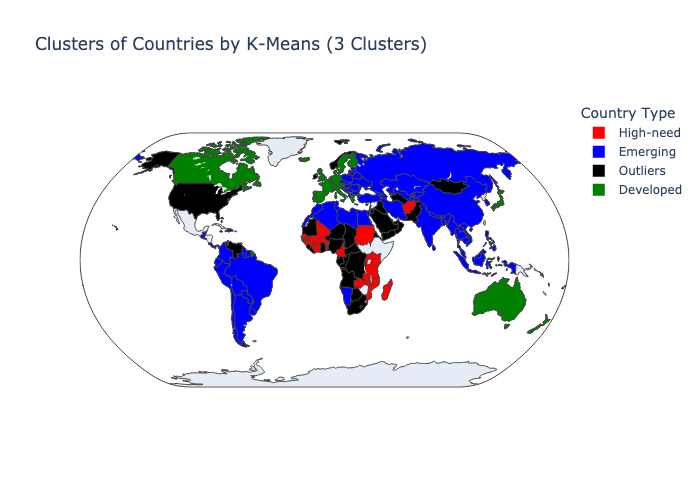

In [20]:
# Visualize world map

# Map numeric clusters to descriptive names
df['Cluster'] = df['Cluster'].map({
    -1: "Outliers",
    0: "Emerging",
    1: "Developed",
    2: "High-need"
})

# Define the custom color palette
custom_palette = {
    "Outliers": "black",    # Outliers countries in black
    "Developed": "green",    # Developed countries in green
    "Emerging": "blue",      # Emerging countries in blue
    "High-need": "red"         # High-need countries in red
}

# Create the choropleth map with custom colors
fig = px.choropleth(
    data_frame=df,
    locations="country",
    locationmode="country names",
    color="Cluster",
    hover_name="country",
    color_discrete_map={
        "Outliers": "black",
        "Developed": "green",
        "Emerging": "blue",  
        "High-need": "red"   
    },
    title="Clusters of Countries by K-Means (3 Clusters)",
    projection="natural earth"
)

fig.update_layout(legend_title_text='Country Type')
# Use 'renderer="png"' for a static image in the notebook
fig.show(renderer='png')
# Removing the renderer argument will display an interactive version, which is suitable when running the app externally (e.g., outside GitHub).
# To see the interactive map, run: fig.show()

The distribution of countries among the three clusters differs between K-means, Hierarchical Clustering, and DBSCAN due to the distinct approaches and assumptions inherent in each method. K-means partitions data by minimizing within-cluster variance using centroids, which tends to produce spherical clusters, while Hierarchical Clustering builds a nested structure of clusters based on linkage criteria, allowing for varying cluster shapes and granularity. In contrast, DBSCAN identifies clusters based on point density and can classify points as noise if they do not meet a minimum density threshold. These methodological differences mean that each algorithm emphasizes different aspects of the data’s structure, leading to variations in cluster boundaries and the subsequent assignment of countries across the clusters.

# Conclusions

By adopting any of the clustering methods with 3 clusters, HELP International gains a clear, actionable segmentation of countries:
- Developed countries: Highly developed, possible collaborators or lower-priority recipients.
- Emerging countries: Developing economies with moderate need.
- High-need countries: Urgent priority, critical need for humanitarian intervention.

These insights equip the NGO’s leadership with a data-driven framework to allocate resources effectively and measure the impact of their interventions on some of the world’s most vulnerable populations.

By incorporating additional data sources, refining hyperparameters, and exploring new modeling techniques, HELP International can continually improve its country segmentation. This evolving, data-driven strategy will help the organization allocate its resources more effectively, ensure maximum impact, and remain adaptable to the changing socio-economic landscapes of the countries it serves.